In [2]:
# ! pip3 install pandas
# ! pip3 install altair
# ! pip3 install matplotlib
# ! pip3 install seaborn
# ! pip3 install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

In [4]:
mh_df = pd.read_csv("https://raw.githubusercontent.com/anikdip/data_visualisation/main/Mental%20Health%20Dataset.csv")

<h2>Initial Study and Cleaning</h2>

This summary allows me to get a quick overview of a DataFrame

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)
    
summary(mh_df)

data shape: (292364, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Timestamp,object,0,0.000000,2313,580,292364,8/27/2014 11:29,8/27/2014 11:31,8/27/2014 11:32
Gender,object,0,0.000000,2313,2,292364,Female,Female,Female
Country,object,0,0.000000,2313,35,292364,United States,United States,United States
Occupation,object,0,0.000000,2313,5,292364,Corporate,Corporate,Corporate
self_employed,object,5202,0.017793,2313,2,287162,NaN,NaN,NaN
family_history,object,0,0.000000,2313,2,292364,No,Yes,Yes
treatment,object,0,0.000000,2313,2,292364,Yes,Yes,Yes
Days_Indoors,object,0,0.000000,2313,5,292364,1-14 days,1-14 days,1-14 days
Growing_Stress,object,0,0.000000,2313,3,292364,Yes,Yes,Yes
Changes_Habits,object,0,0.000000,2313,3,292364,No,No,No


I notice that the columns are inconsitently named. I will change the ones with only lower case letters to make them fit.

In [6]:
column_mappings = {
    'Timestamp': 'Timestamp',
    'Gender': 'Gender',
    'Country': 'Country',
    'Occupation': 'Occupation',
    'self_employed': 'Self_Employed',
    'family_history': 'Family_History',
    'treatment': 'Treatment',
    'Days_Indoors': 'Days_Indoors',
    'Growing_Stress': 'Growing_Stress',
    'Changes_Habits': 'Changes_Habits',
    'Mental_Health_History': 'Mental_Health_History',
    'Mood_Swings': 'Mood_Swings',
    'Coping_Struggles': 'Coping_Struggles',
    'Work_Interest': 'Work_Interest',
    'Social_Weakness': 'Social_Weakness',
    'mental_health_interview': 'Mental_Health_Interview',
    'care_options': 'Care_Options'
}

mh_df.rename(columns=column_mappings, inplace=True)

Dropping duplicates

In [7]:
mh_df = mh_df.drop_duplicates()

Filling the missing values in the self_employed column with unknown

In [8]:

mh_df['Self_Employed'] = mh_df['Self_Employed'].fillna("Unknown")

Converting the Time stamp to a datetime object so i extract the date and time seperately. 

In [9]:
 
mh_df['Timestamp'] = pd.to_datetime(mh_df['Timestamp'])

#Making new columns for the date and time
mh_df['Date'] = mh_df['Timestamp'].dt.date
mh_df['Time_Of_Day'] = mh_df['Timestamp'].dt.time

#And for month day and year
mh_df['Day'] = mh_df['Timestamp'].dt.day
mh_df['Month'] = mh_df['Timestamp'].dt.month
mh_df['Year'] = mh_df['Timestamp'].dt.year

Getting the summary again to see how the dataset has been altered

In [10]:
summary(mh_df)

data shape: (290051, 22)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Timestamp,datetime64[ns],0,0.0,0,580,290051,2014-08-27 11:29:00,2014-08-27 11:31:00,2014-08-27 11:32:00
Gender,object,0,0.0,0,2,290051,Female,Female,Female
Country,object,0,0.0,0,35,290051,United States,United States,United States
Occupation,object,0,0.0,0,5,290051,Corporate,Corporate,Corporate
Self_Employed,object,0,0.0,0,3,290051,Unknown,Unknown,Unknown
Family_History,object,0,0.0,0,2,290051,No,Yes,Yes
Treatment,object,0,0.0,0,2,290051,Yes,Yes,Yes
Days_Indoors,object,0,0.0,0,5,290051,1-14 days,1-14 days,1-14 days
Growing_Stress,object,0,0.0,0,3,290051,Yes,Yes,Yes
Changes_Habits,object,0,0.0,0,3,290051,No,No,No


<h2>Exploratory analysis</h2>

Distribution of Categorical Variables

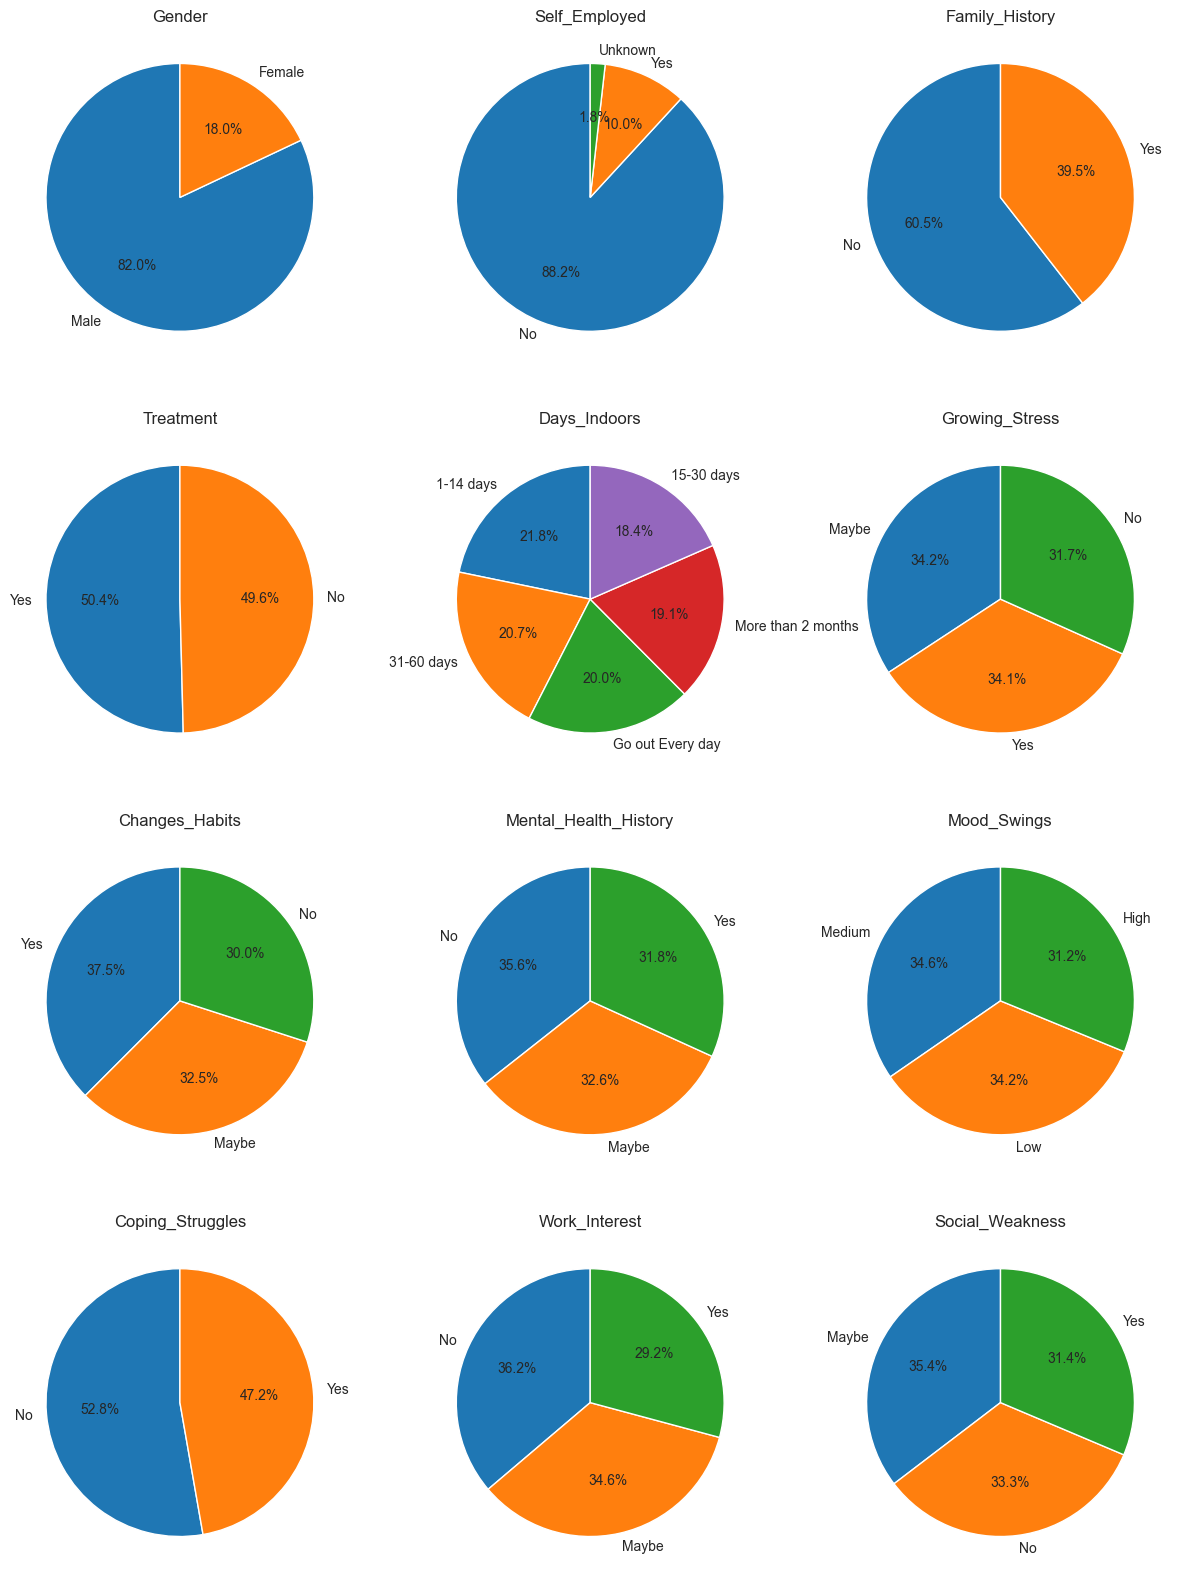

In [11]:
sns.set_style("whitegrid")

cols_to_visualize = ['Gender','Self_Employed','Family_History', 'Treatment', 'Days_Indoors', 'Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']
counts = []

for col in cols_to_visualize:
    counts.append(mh_df[col].value_counts())
    
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)
    

plt.show()

Temporal analysis

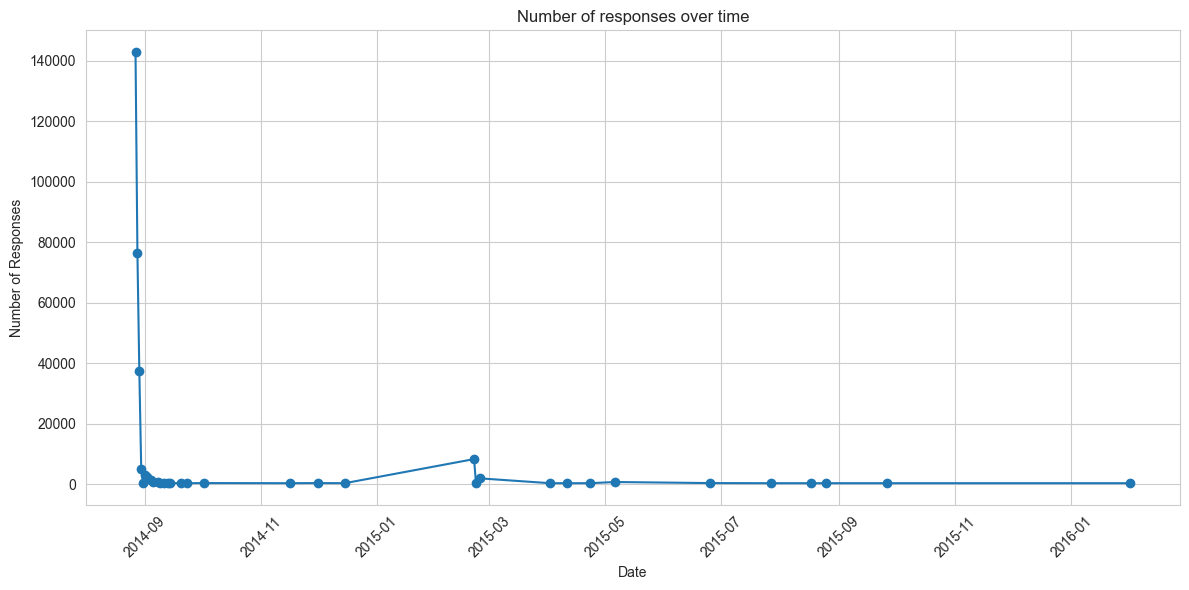

In [12]:
daily_counts = mh_df.groupby(mh_df['Date']).size()
daily_counts.head()

plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
plt.title('Number of responses over time')
plt.xlabel('Date')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()